# 机器学习流程
1. 数据收集
2. 数据清洗
3. 数据标注
4. 数据增强
5. 模型设计
6. 模型训练
7. 模型评估

In [2]:
# 代码打开摄像头
import cv2
# 根据摄像头ID打开乐视摄像头
cap=cv2.VideoCapture(0)

while True:
    ret,frame=cap.read()
    if not ret:
        continue
    k=cv2.waitKey(10)
    if k==ord('q'):
        break
    cv2.imshow("image",frame)
cap.release()
cv2.destroyAllWindows()

## 数据采集

In [4]:
## 采集stop类型的图片
import os
cap=cv2.VideoCapture(0)
count=0
IMG_SAVE_PATH='./stop'

while True:
    ret,frame=cap.read()
    if not ret:
        continue
    k=cv2.waitKey(10)
    if k==ord('q'):
        break
        
    if k==32:#如果按下空格键
        save_path=os.path.join(IMG_SAVE_PATH,'{}.jpg'.format(count))
        count+=1
        cv2.imwrite(save_path,frame)
    cv2.putText(frame,"collecting{}".format(count),(5,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,255),2,cv2.LINE_AA)
    cv2.imshow("image",frame)
cap.release()
cv2.destroyAllWindows()

In [29]:
## 采集go类型的图片
import os
cap=cv2.VideoCapture(0)
count=0
IMG_SAVE_PATH='./go'

while True:
    ret,frame=cap.read()
    if not ret:
        continue
    k=cv2.waitKey(10)
    if k==ord('q'):
        break
        
    if k==32:#如果按下空格键
        save_path=os.path.join(IMG_SAVE_PATH,'{}.jpg'.format(count))
        count+=1
        cv2.imwrite(save_path,frame)
    cv2.putText(frame,"collecting{}".format(count),(5,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,255),2,cv2.LINE_AA)
    cv2.imshow("image",frame)
cap.release()
cv2.destroyAllWindows()

In [6]:
## 采集parking类型的图片
import os
cap=cv2.VideoCapture(0)
count=0
IMG_SAVE_PATH='./parking'

while True:
    ret,frame=cap.read()
    if not ret:
        continue
    k=cv2.waitKey(10)
    if k==ord('q'):
        break
        
    if k==32:#如果按下空格键
        save_path=os.path.join(IMG_SAVE_PATH,'{}.jpg'.format(count))
        count+=1
        cv2.imwrite(save_path,frame)
    cv2.putText(frame,"collecting{}".format(count),(5,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,255),2,cv2.LINE_AA)
    cv2.imshow("image",frame)
cap.release()
cv2.destroyAllWindows()

In [30]:
## 采集other类型的图片
import os
cap=cv2.VideoCapture(0)
count=0
IMG_SAVE_PATH='./other'

while True:
    ret,frame=cap.read()
    if not ret:
        continue
    k=cv2.waitKey(10)
    if k==ord('q'):
        break
        
    if k==32:#如果按下空格键
        save_path=os.path.join(IMG_SAVE_PATH,'{}.jpg'.format(count))
        count+=1
        cv2.imwrite(save_path,frame)
    cv2.putText(frame,"collecting{}".format(count),(5,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,255),2,cv2.LINE_AA)
    cv2.imshow("image",frame)
cap.release()
cv2.destroyAllWindows()

## 数据标注

In [31]:
import os
images=[]#存储所有的照片
labels=[]#存储所有的标注信息 0：other；1：go；2：parking；3：stop

files=os.listdir('./other/')#其他
for file in files:
    path=os.path.join('./other/',file)
    img=cv2.imread(path)
    ## 压缩原始图片到150*150分辨率
    images.append(cv2.resize(img,(150,150),interpolation=cv2.INTER_AREA))
    labels.append(0) #other的标签是0
    
files=os.listdir('./go/')#其他
for file in files:
    path=os.path.join('./go/',file)
    img=cv2.imread(path)
    ## 压缩原始图片到150*150分辨率
    images.append(cv2.resize(img,(150,150),interpolation=cv2.INTER_AREA))
    labels.append(1) #go的标签是1
    
files=os.listdir('./parking/')#其他
for file in files:
    path=os.path.join('./parking/',file)
    img=cv2.imread(path)
    ## 压缩原始图片到150*150分辨率
    images.append(cv2.resize(img,(150,150),interpolation=cv2.INTER_AREA))
    labels.append(2) #parking的标签是2

files=os.listdir('./stop/')#其他
for file in files:
    path=os.path.join('./stop/',file)
    img=cv2.imread(path)
    ## 压缩原始图片到150*150分辨率
    images.append(cv2.resize(img,(150,150),interpolation=cv2.INTER_AREA))
    labels.append(3) #stop的标签是3

In [32]:
print("一共采集了{}条数据，{}条标签".format(len(images),len(labels)))

一共采集了999条数据，999条标签


# 持久化保存训练数据

In [42]:
import numpy as np
np.savez("images.npz",images)
np.savez("labels.npz",labels)

<IPython.core.display.Javascript object>


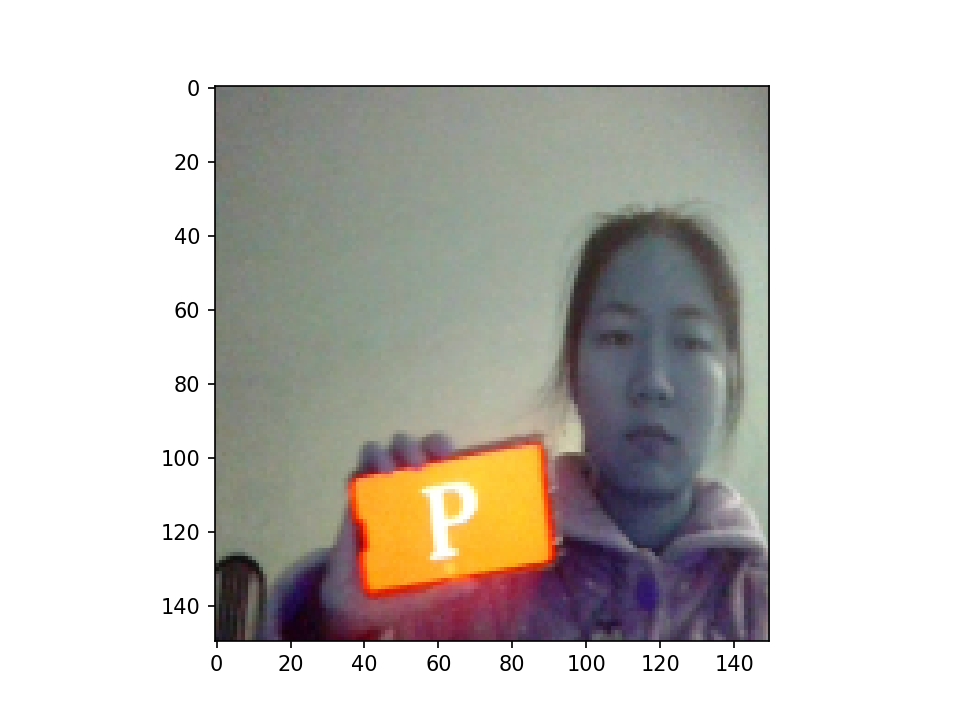

2


In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
index=np.random.randint(len(images))
plt.imshow(images[index])
print(labels[index])

## 模型设计

In [17]:
# input-->Conv-->ReLU-->Pool-->Conv-->ReLU-->Pool-->FC-->Output
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D

In [38]:
# 构建卷积神经网络
model=Sequential()

# 第一层卷积，卷积核3*3，特征提取器的数量是16，激活函数是relu
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))

# 降采样，pooling把图像的大小变成原来的1/4
model.add(MaxPool2D(pool_size=(2,2)))

# 第二层卷积
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 降维打击，数据打平，把多个卷积后的图像，转换成一个特征向量
model.add(Flatten())

# 全连接层，隐藏层神经元数量是200
model.add(Dense(200,activation='relu'))

# 输出层
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 32)       

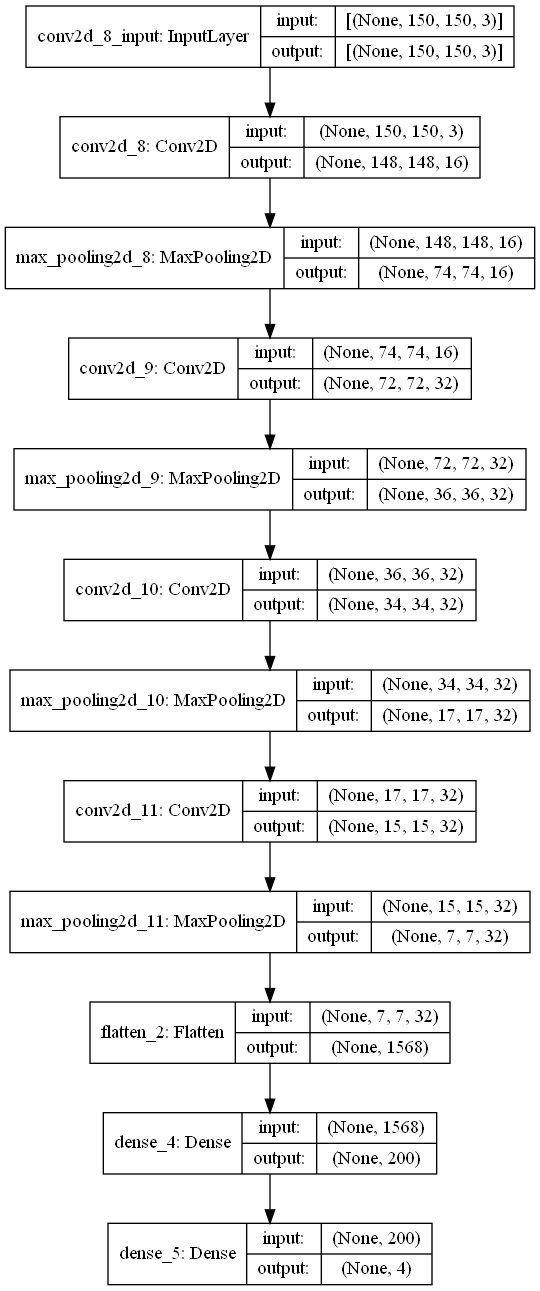

In [21]:
# 模型可视化
tf.keras.utils.plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True)

In [39]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy','mse'])

In [40]:
x=np.array(images)/255.0#图像归一化，把0~255的像素压缩到0~1间
y=np.eye(4)[labels]
model.fit(x,y,batch_size=100,epochs=25)

Epoch 1/25
10/10 [==============================] - 7s 645ms/step - loss: 1.3599 - accuracy: 0.3063 - mse: 0.1839
Epoch 2/25
10/10 [==============================] - 6s 641ms/step - loss: 1.2077 - accuracy: 0.4224 - mse: 0.1651
Epoch 3/25
10/10 [==============================] - 8s 810ms/step - loss: 0.8693 - accuracy: 0.6396 - mse: 0.1206
Epoch 4/25
10/10 [==============================] - 8s 847ms/step - loss: 0.7476 - accuracy: 0.6557 - mse: 0.1075
Epoch 5/25
10/10 [==============================] - 9s 855ms/step - loss: 0.5025 - accuracy: 0.8258 - mse: 0.0703
Epoch 6/25
10/10 [==============================] - 9s 914ms/step - loss: 0.3495 - accuracy: 0.8739 - mse: 0.0484
Epoch 7/25
10/10 [==============================] - 8s 844ms/step - loss: 0.2672 - accuracy: 0.9019 - mse: 0.0363
Epoch 8/25
10/10 [==============================] - 8s 843ms/step - loss: 0.1803 - accuracy: 0.9419 - mse: 0.0236
Epoch 9/25
10/10 [==============================] - 8s 847ms/step - loss: 0.1073 - accur

# 模型保存

In [43]:
model.save('go_p_stop.h5')

# 模型预测

In [25]:
cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    if not ret:
        continue
    img=cv2.resize(frame,(150,150))
    #预测的值
    pred=model.predict(np.array([img/255.0]))    
    result=np.argmax(pred)
    cv2.putText(frame,"-->{}".format(result),(5,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,255),2,cv2.LINE_AA)    
    cv2.imshow("predict",frame)
    k=cv2.waitKey(10)
    if k==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [41]:
cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    if not ret:
        continue
    img=cv2.resize(frame,(150,150))
    #预测的值
    pred=model.predict(np.array([img/255.0]))    
    result=np.argmax(pred)
    str=''
    if result==0: 
        str='other'
    if result==1:
        str='go'
    if result==2:
        str='parking' 
    if result==3:
        str='stop'
    cv2.putText(frame,"-->{}".format(str),(5,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,255),2,cv2.LINE_AA)   
    cv2.imshow("predict",frame)
    k=cv2.waitKey(10)
    if k==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
model=load.model('go_p_stop.h5')

## 实验任务——Dropout

In [44]:
# 构建卷积神经网络CNN
from tensorflow.keras.layers import Dropout
model=Sequential()

# 第一层卷积，卷积核3*3，特征提取器的数量是16，激活函数是relu
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))

# 降采样，pooling把图像的大小变成原来的1/4
model.add(MaxPool2D(pool_size=(2,2)))
#------------------------------------
model.add(Dropout(0.2))
#------------------------------------
# 第二层卷积
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 降维打击，数据打平，把多个卷积后的图像，转换成一个特征向量
model.add(Flatten())

# 全连接层，隐藏层神经元数量是200
model.add(Dense(200,activation='relu'))
#------------------------------------
model.add(Dropout(0.3))
#------------------------------------
# 输出层
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 32)       

In [45]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy','mse'])
x=np.array(images)/255.0#图像归一化，把0~255的像素压缩到0~1间
y=np.eye(4)[labels]
model.fit(x,y,batch_size=100,epochs=25)

Epoch 1/25
10/10 [==============================] - 8s 736ms/step - loss: 1.3485 - accuracy: 0.3273 - mse: 0.1827
Epoch 2/25
10/10 [==============================] - 8s 804ms/step - loss: 1.1261 - accuracy: 0.5115 - mse: 0.1549
Epoch 3/25
10/10 [==============================] - 9s 897ms/step - loss: 0.8190 - accuracy: 0.6707 - mse: 0.1145
Epoch 4/25
10/10 [==============================] - 9s 897ms/step - loss: 0.7024 - accuracy: 0.7297 - mse: 0.0973
Epoch 5/25
10/10 [==============================] - 10s 977ms/step - loss: 0.5153 - accuracy: 0.8028 - mse: 0.0715
Epoch 6/25
10/10 [==============================] - 10s 983ms/step - loss: 0.3594 - accuracy: 0.8759 - mse: 0.0485
Epoch 7/25
10/10 [==============================] - 10s 978ms/step - loss: 0.3919 - accuracy: 0.8428 - mse: 0.0556
Epoch 8/25
10/10 [==============================] - 9s 935ms/step - loss: 0.2523 - accuracy: 0.9149 - mse: 0.0326
Epoch 9/25
10/10 [==============================] - 10s 962ms/step - loss: 0.1526 - a

In [47]:
cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    if not ret:
        continue
    img=cv2.resize(frame,(150,150))
    #预测的值
    pred=model.predict(np.array([img/255.0]))    
    result=np.argmax(pred)
    str=''
    if result==0: 
        str='other'
    if result==1:
        str='go'
    if result==2:
        str='parking' 
    if result==3:
        str='stop'
    cv2.putText(frame,"-->{}".format(str),(5,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,255),2,cv2.LINE_AA)   
    cv2.imshow("predict",frame)
    k=cv2.waitKey(10)
    if k==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 数据增强
* 在现有的数据基础上，采用图形变换方法增加更多的样本数据

In [49]:
# 数据增强的工具包
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

In [57]:
## 声明一个数据增强器
train_datagen=ImageDataGenerator(rotation_range=45,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,
                   fill_mode='nearest',horizontal_flip=True,vertical_flip=True)

In [60]:
img=load_img('26.jpg')
x=img_to_array(img)
#np.array([x]).shape
i=0
for batch in train_datagen.flow(np.array([x]),save_to_dir='output',save_format='jpg'):
    i+=1
    if i>100:
        break
